## Comparison with the ninth spectroscopic binary catalog (SB9)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from astropy.table import Table

import sys
sys.path.insert(0, "../")

import velociraptor

%matplotlib inline

In [2]:
sb9 = Table.read("../data/sb9_matched_by_position.fits")

In [3]:
print(sb9.dtype.names)

('Seq_1', 'N_1', 'o', 'Per', 'f_Per', 'e_Per', 'T0', 'n_T0', 'e_T0', 'f_T0', 'e', 'f_e', 'e_e', 'omega', 'f_omega', 'e_omega', 'K1', 'u_K1', 'f_K1', 'e_K1', 'K2', 'u_K2', 'f_K2', 'e_K2', 'V0', 'u_V0', 'f_V0', 'e_V0', 'rms1', 'rms2', 'o_K1', 'o_K2', 'Grade', 'Ref', 'Contr', 'SB8', 'Details', 'Seq_2', 'N_2', 'RAJ2000', 'DEJ2000', 'Comp', 'mag1', 'n_mag1', 'mag2', 'n_mag2', 'Sp1', 'Sp2', 'Name', 'Simbad', 'source_id', 'designation', 'ra', 'dec', 'l', 'b', 'ecl_lon', 'ecl_lat', 'parallax', 'pmra', 'pmdec', 'phot_g_mean_mag', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'ra_error', 'dec_error', 'parallax_error', 'pmra_error', 'pmdec_error', 'a_g_percentile_lower', 'a_g_percentile_upper', 'a_g_val', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_gof_al', 'astrometric_matched_observations', 'astrometric_n_bad_obs_al', 'astrometric_n_good_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_obs_al', 'astrometric_params_solved', 'astrometric_primary_flag',

In [10]:
data = Table.read("../data/rv-all.fits")
sb9 = Table.read("../data/sb9_matched_by_position.fits")

sb9_indices = np.nan * np.ones(len(sb9))
for i, source_id in enumerate(sb9["source_id"]):

    try:
        sb9_indices[i] = np.where(data["source_id"] == int(source_id))[0][0]

    except:
        continue

finite = np.isfinite(sb9_indices)
sb9 = sb9[finite]
data = data[sb9_indices[finite].astype(int)]

In [12]:
print(len(data), len(sb9))

2150 2150


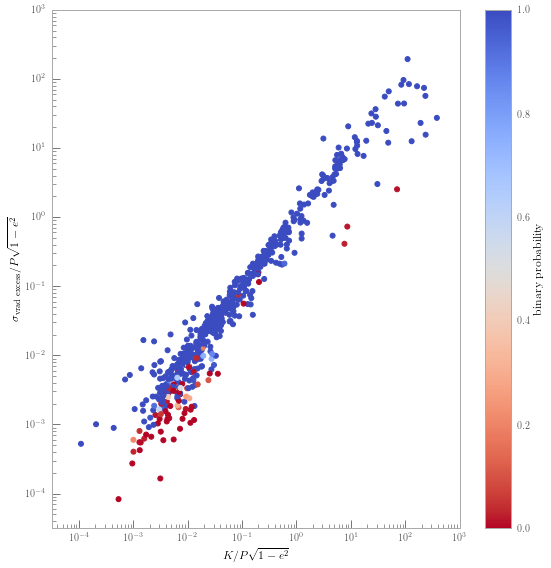

In [23]:
scalar = 1.0 / (sb9["Per"] * (1 - sb9["e"]**2)**0.5)
x = sb9["K1"] * scalar
y = data["rv_excess_variance"]**0.5 * scalar
c = data["p_sb_50"]

kwds = dict(vmin=0, vmax=1, s=25, cmap="coolwarm_r")
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
scat = ax.scatter(x, y, c=c, **kwds)
ax.loglog()

ax.set_xlim(10**-4.5, 10**3)
ax.set_ylim(10**-4.5, 10**3)

cbar = plt.colorbar(scat)
cbar.set_label(r"\textrm{binary probability}")
ax.set_xlabel(r"${K}/{P\sqrt{1-e^2}}$")
ax.set_ylabel(r"${\sigma_\textrm{vrad excess}}/{P\sqrt{1-e^2}}$")

fig.tight_layout()

In [25]:
def what_did_we_find(data, consistent_with_single,
                     latex_label_name=None, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    
    kwds = dict(histtype="bar", stacked="True", alpha=0.5)
    kwds.update(kwargs)

    finite = np.isfinite(data)
    ax.hist([
        data[finite * consistent_with_single],
        data[finite * (~consistent_with_single)],
    ], label=("single", "binary"), **kwargs)
    
    legend = plt.legend()
    
    if latex_label_name is not None:
        ax.set_xlabel(latex_label_name)
    
    ax.set_ylabel(r"\textrm{count}")
    
    fig.tight_layout()
    
    return fig



/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


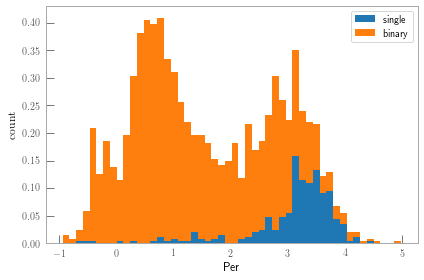

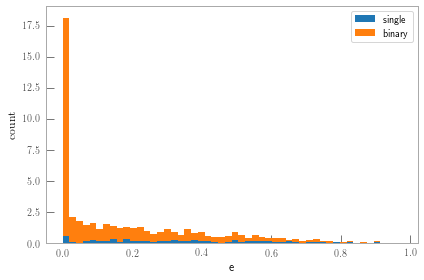

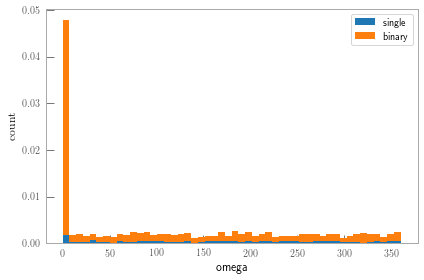

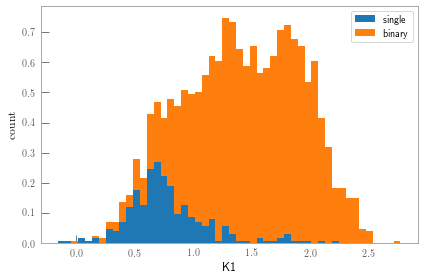

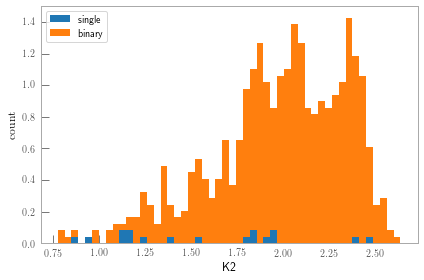

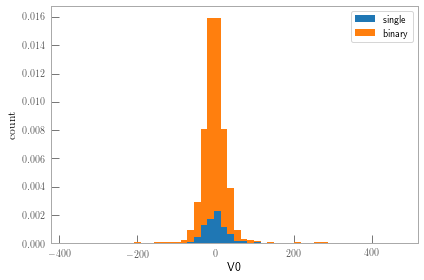

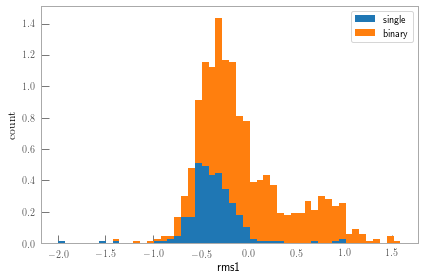

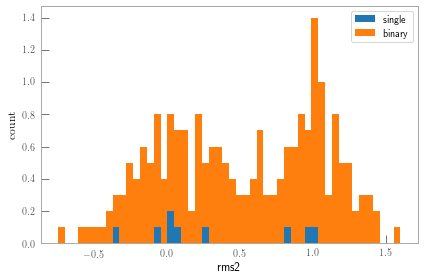

In [36]:
label_names = ("Per", "e", "omega", "K1", "K2", "V0", "rms1", "rms2")

kwds = dict(histtype="bar", stacked="True", normed=1, alpha=1, bins=50)

for label_name in label_names:
    v = sb9[label_name]
    if label_name in ("Per", "rms1", "rms2", "K1", "K2"):
        what_did_we_find(np.log10(v), data["p_sb_50"] < 0.5,
                         latex_label_name=label_name, **kwds)
    else:
        what_did_we_find(v, data["p_sb_50"] < 0.5,
                         latex_label_name=label_name, **kwds)

/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


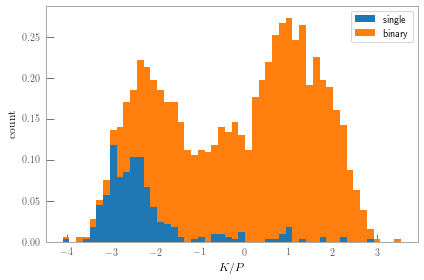

In [39]:
fig = what_did_we_find(np.log10(sb9["K1"]/sb9["Per"]), data["p_sb_50"] < 0.5,
                       latex_label_name=r"$K/P$", **kwds)


In [ ]:
# What about within the period range that we can reasonably detect?

/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)


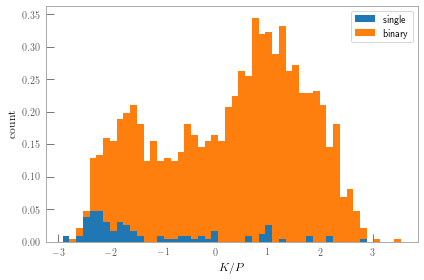

In [41]:
# We can probably detect out to twice the observing span of Gaia (21 mo): 42 months.
detectable = (sb9["Per"] < 42*30.0)
fig = what_did_we_find(np.log10(sb9["K1"]/sb9["Per"])[detectable],
                       (data["p_sb_50"] < 0.5)[detectable],
                       latex_label_name=r"$K/P$", **kwds)


/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/astropy/table/column.py:929: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, oper)(other)
/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


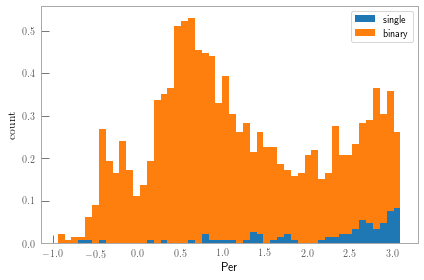

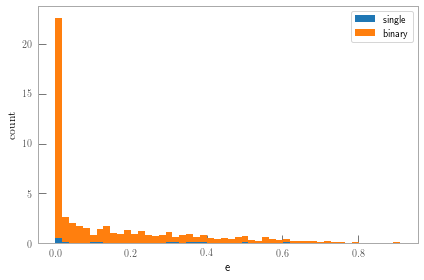

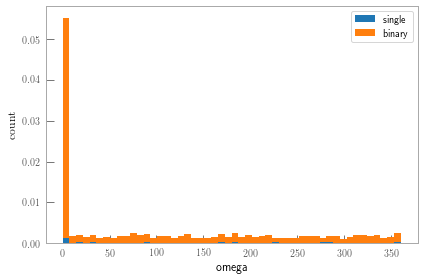

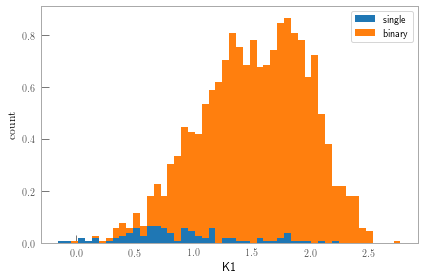

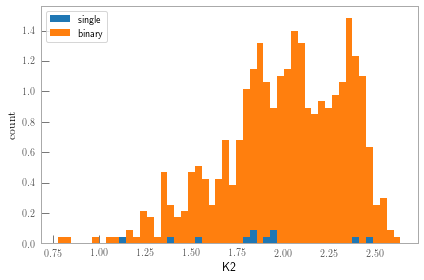

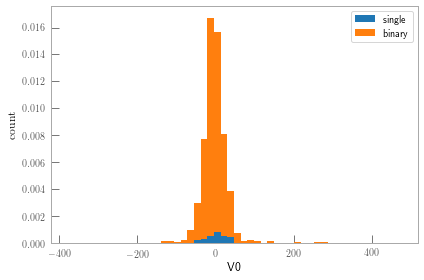

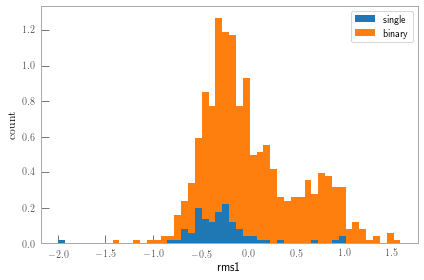

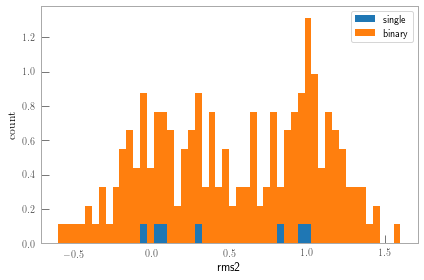

In [42]:
label_names = ("Per", "e", "omega", "K1", "K2", "V0", "rms1", "rms2")

kwds = dict(histtype="bar", stacked="True", normed=1, alpha=1, bins=50)

for label_name in label_names:
    v = sb9[label_name][detectable]
    m = (data["p_sb_50"] < 0.5)[detectable]
    if label_name in ("Per", "rms1", "rms2", "K1", "K2"):
        what_did_we_find(np.log10(v), m,
                         latex_label_name=label_name, **kwds)
    else:
        what_did_we_find(v, m,
                         latex_label_name=label_name, **kwds)

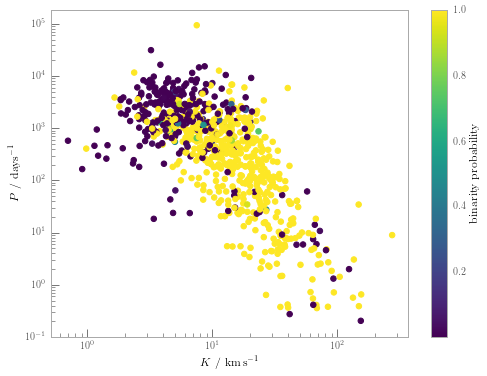

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))

scat = ax.scatter(sb9["K1"], sb9["Per"],
                  c=data["p_sb_50"], s=30)
ax.loglog()

ax.set_xlabel(r"$K\,\,/\,\,\mathrm{km\,s}^{-1}$")
ax.set_ylabel(r"$P\,\,/\,\,\mathrm{days}^{-1}$")

cbar = plt.colorbar(scat)
cbar.set_label(r"\textrm{binarity probability}")


/Users/arc/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


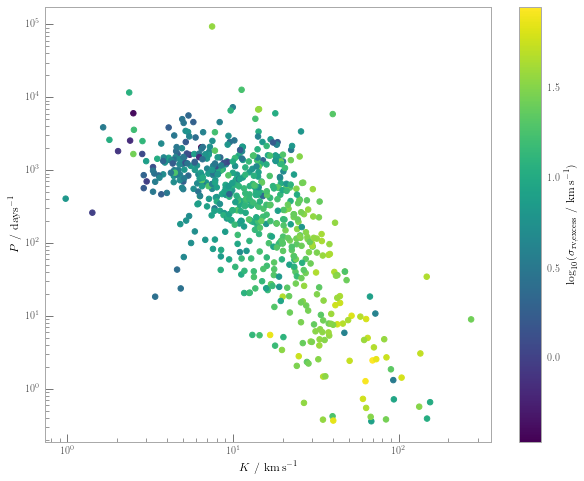

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))

scat = ax.scatter(sb9["K1"], sb9["Per"],
                  c=np.log10(data["rv_excess_variance"]**0.5), s=30)
ax.loglog()

ax.set_xlabel(r"$K\,\,/\,\,\mathrm{km\,s}^{-1}$")
ax.set_ylabel(r"$P\,\,/\,\,\mathrm{days}^{-1}$")

cbar = plt.colorbar(scat)
cbar.set_label(r"$\log_{10}(\sigma_\mathrm{rv,excess}\,\,/\,\,\mathrm{km\,s}^{-1})$")
